In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/Evaluation_Week1/WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_rows', None)
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
categorial_features = df.select_dtypes(include=[np.object])
categorial_features.head(2)
#frequency of categories
for col in categorial_features:
    print(df[col].value_counts())
a=(df[col].value_counts())


No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: Over

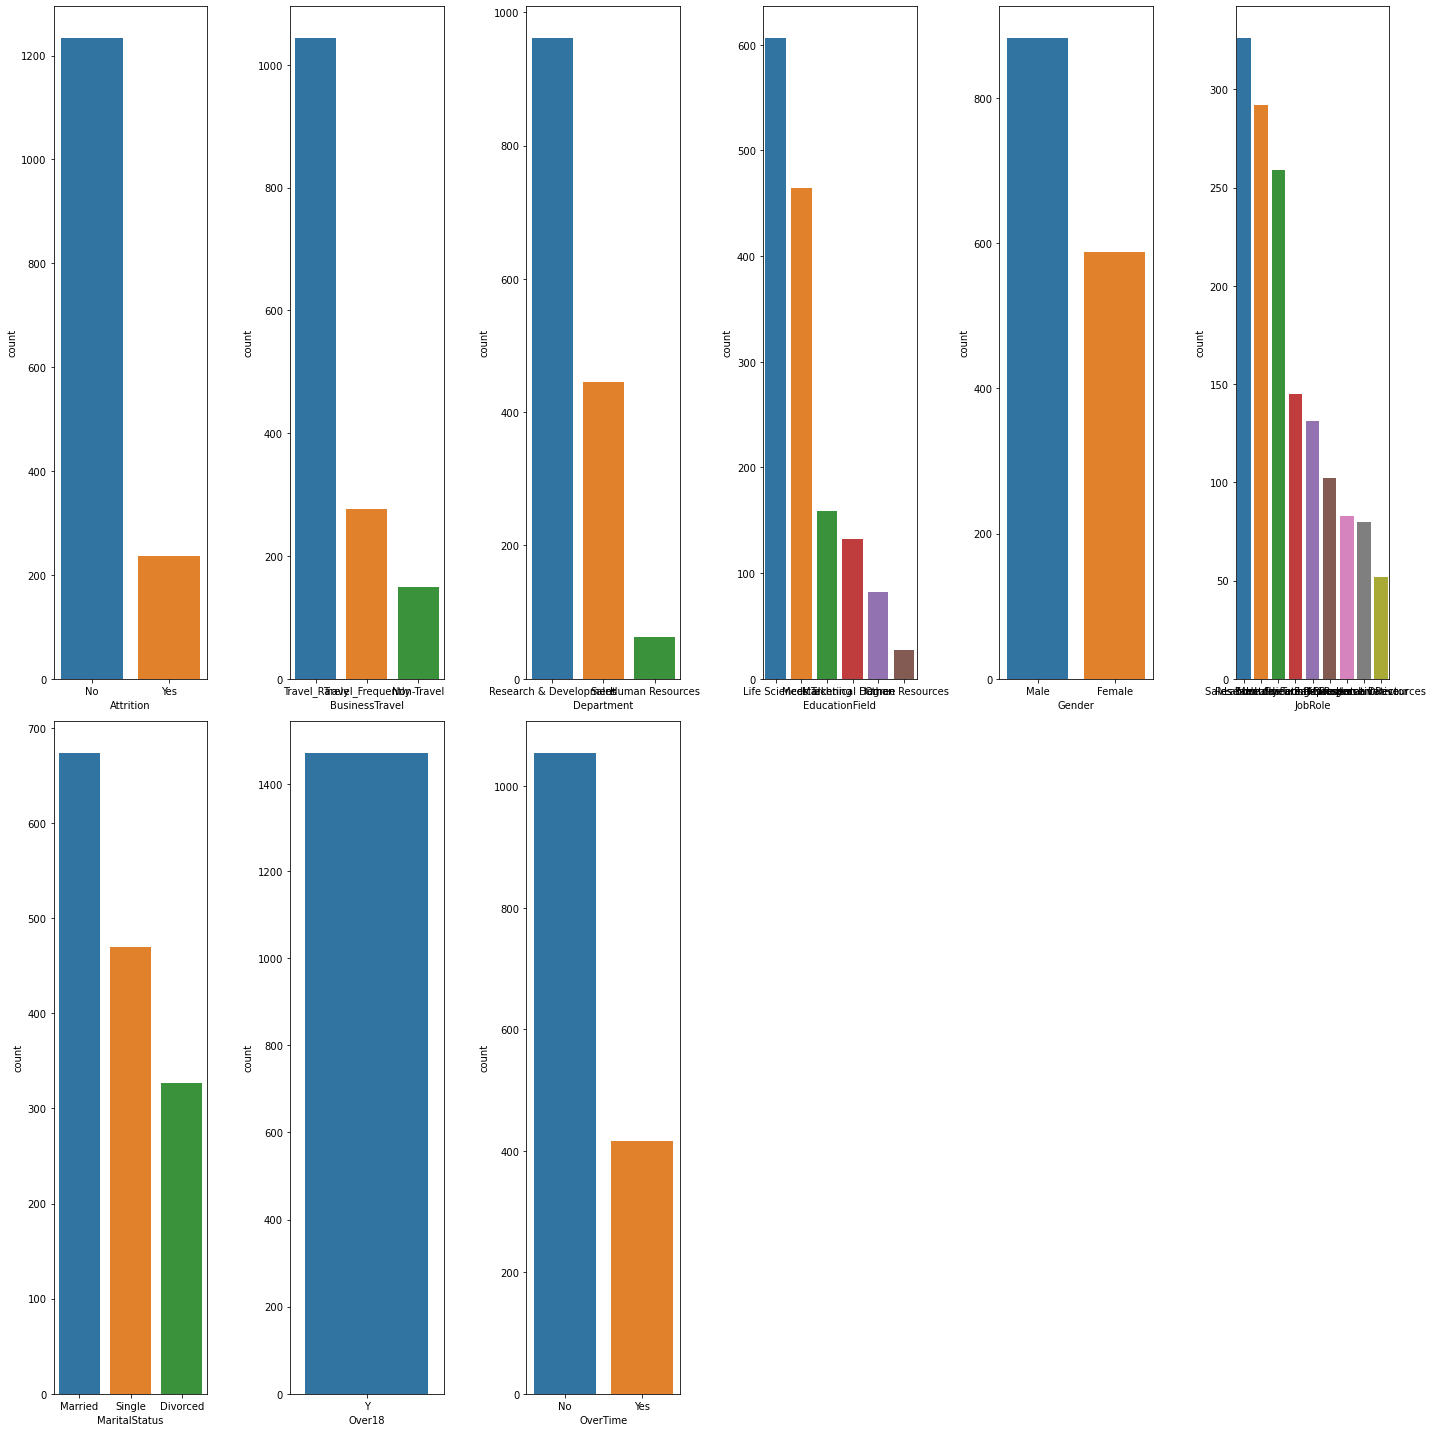

In [22]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in categorial_features:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        sns.countplot(x=df[column], data=df,order=df[column].value_counts().index)
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.tight_layout()  

In [24]:
categorial_features.head(2)

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   

              JobRole MaritalStatus Over18 OverTime  
0     Sales Executive        Single      Y      Yes  
1  Research Scientist       Married      Y       No

In [28]:
#Attrition is imBalanced, Its a Label and need to balance
#Will Use SMOTE-Oversampling method to Balance, Where the variable which are less will be oversampled
#These all ook like catogorical , So will use Label encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df['Attrition']=LE.fit_transform(df['Attrition'])
df['BusinessTravel']=LE.fit_transform(df['BusinessTravel'])
df['Department']=LE.fit_transform(df['Department'])
df['EducationField']=LE.fit_transform(df['EducationField'])
df['Gender']=LE.fit_transform(df['Gender'])
df['JobRole']=LE.fit_transform(df['JobRole'])
df['MaritalStatus']=LE.fit_transform(df['MaritalStatus'])
df['Over18']=LE.fit_transform(df['Over18'])
df['OverTime']=LE.fit_transform(df['OverTime'])

In [30]:
df.info()
df['Attrition'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

0    1233
1     237
Name: Attrition, dtype: int64

In [31]:
x=df.drop(columns=['Attrition'],axis=1)
y=df['Attrition']

from imblearn.over_sampling import SMOTE
oversample=SMOTE(0.75,k_neighbors=5)
x_smoted, y_smoted=oversample.fit_resample(x,y)

# summarize distribution
counter = y_smoted.value_counts()
for k,v in counter.items():
    per = v / len(y_smoted) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=1233 (57.163%)
Class=1, n=924 (42.837%)


In [35]:
x_smoted.shape

(2157, 35)

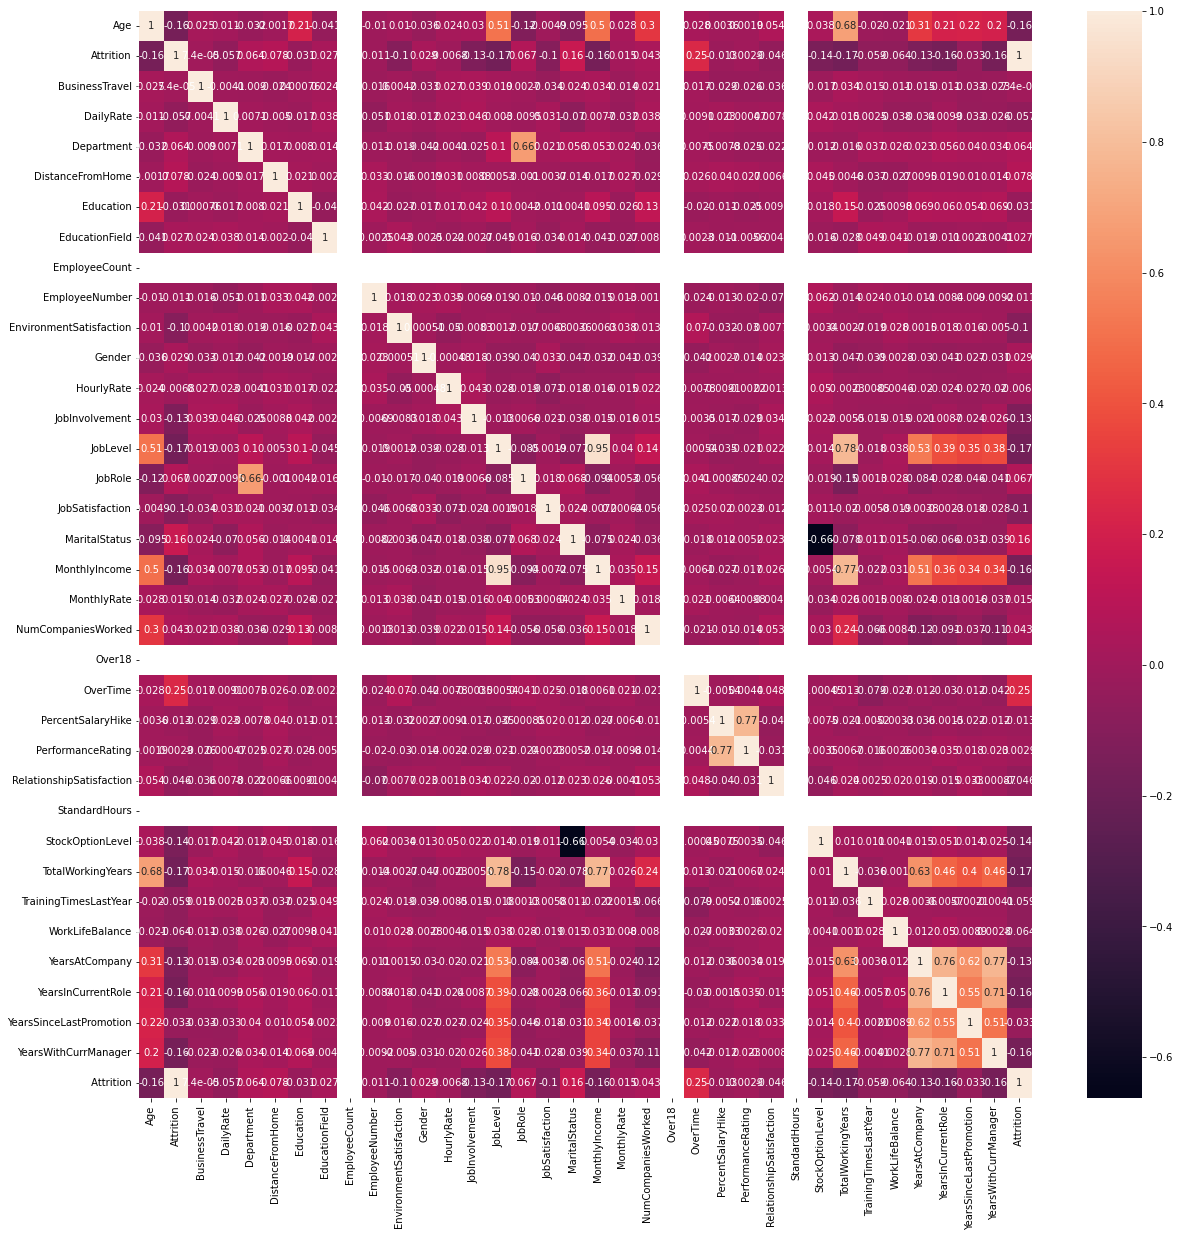

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
Over18                         NaN        NaN             NaN        NaN   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.

In [48]:
#Multicollinearity #Let see if the x values are correlated, 
Corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(Corr,annot=True)
plt.show()
Corr

#If you see the correlation of all the features with the label is very very Less, This tells us that cummulative analysis of all the fetures would give us conclusive result

In [43]:
#Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x_smoted.columns


vif_data["VIF"] = [variance_inflation_factor(x_smoted.values, i)
                          for i in range(len(x_smoted.columns))]
print(vif_data)
#Joblevel and Monthly Income are related, One can be removed
#Wil Remove Job Level based on little high VIF value


                     feature        VIF
0                        Age   2.161622
1             BusinessTravel   1.035217
2                  DailyRate   1.045165
3                 Department   1.938208
4           DistanceFromHome   1.038541
5                  Education   1.100704
6             EducationField   1.038155
7              EmployeeCount   0.000000
8             EmployeeNumber   1.034821
9    EnvironmentSatisfaction   1.126024
10                    Gender   1.045658
11                HourlyRate   1.037507
12            JobInvolvement   1.138230
13                  JobLevel  11.832882
14                   JobRole   1.850310
15           JobSatisfaction   1.114175
16             MaritalStatus   1.650029
17             MonthlyIncome  11.129552
18               MonthlyRate   1.043314
19        NumCompaniesWorked   1.266473
20                    Over18        NaN
21                  OverTime   1.067985
22         PercentSalaryHike   2.024726
23         PerformanceRating   2.018563


In [44]:
x_smoted.drop(columns=['JobLevel'],axis=1)
x_smoted.drop(columns=['Over18'],axis=1)

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           2                 1          2   
1      49               1        279           1                 8          1   
2      37               2       1373           1                 2          2   
3      33               1       1392           1                 3          4   
4      27               2        591           1                 2          1   
5      32               1       1005           1                 2          2   
6      59               2       1324           1                 3          3   
7      30               2       1358           1                24          1   
8      38               1        216           1                23          3   
9      36               2       1299           1                27          3   
10     35               2        809           1                16          3   
11     29               2        153           1                15          2   
12     31               2        670           1                26          1   
13     34               2       1346           1                19          2   
14     28               2        103           1                24          3   
15     29               2       1389           1                21          4   
16     32               2        334           1                 5          2   
17     22               0       1123           1                16          2   
18     53               2       1219           2                 2          4   
19     38               2        371           1                 2          3   
20     24               0        673           1                11          2   
21     36               2       1218           2                 9          4   
22     34               2        419           1                 7          4   
23     21               2        391           1                15          2   
24     34               2        699           1                 6          1   
25     53               2       1282           1                 5          3   
26     32               1       1125           1                16          1   
27     42               2        691           2                 8          4   
28     44               2        477           1                 7          4   
29     46               2        705           2                 2          4   
30     33               2        924           1                 2          3   
31     44               2       1459           1                10          4   
32     30               2        125           1                 9          2   
33     39               2        895           2                 5          3   
34     24               2        813           1                 1          3   
35     43               2       1273           1                 2          2   
36     50               2        869           2                 3          2   
37     35               2        890           2                 2          3   
38     36               2        852           1                 5          4   
39     33               1       1141           2                 1          3   
40     35               2        464           1                 4          2   
41     27               2       1240           1                 2          4   
42     26               2       1357           1                25          3   
43     27               1        994           2                 8          3   
44     30               1        721           1                 1          2   
45     41               2       1360           1                12          3   
46     34               0       1065           2                23          4   
47     37               2        408           1                19          2   
48     46               1       1211 

In [51]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_smoted)
x_scaled.shape

(2157, 35)

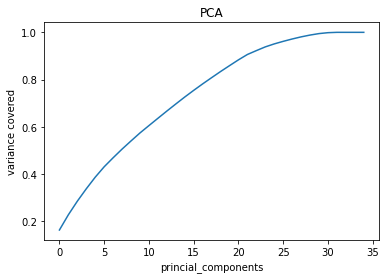

In [52]:
from sklearn.decomposition import PCA
pca=PCA()
components=pca.fit_transform(x_scaled)

plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('princial_components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [54]:
#Would go with 30 Principle components
principl_component=pd.DataFrame(components)
cols  = principl_component.columns
principl_component.drop(columns =cols[30:35],inplace=True)
principl_component.shape

(2157, 30)

In [56]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(principl_component,y_smoted,test_size=0.25, random_state=100)

In [57]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       311
           1       1.00      0.99      0.99       229

    accuracy                           0.99       540
   macro avg       1.00      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [58]:
from sklearn.ensemble import BaggingClassifier
bclf=BaggingClassifier()
bclf.fit(x_train,y_train)
y_pred=bclf.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       311
           1       0.96      0.95      0.95       229

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       311
           1       0.94      0.98      0.96       229

    accuracy                           0.96       540
   macro avg       0.96      0.97      0.96       540
weighted avg       0.97      0.96      0.96       540



In [60]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       311
           1       0.90      0.93      0.91       229

    accuracy                           0.93       540
   macro avg       0.92      0.93      0.92       540
weighted avg       0.93      0.93      0.93       540



In [61]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       229

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [66]:
#Would go with random foest
#Cross Validation

from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f
principl_component=pd.DataFrame(principl_component)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(principl_component):
    x_train , x_test = principl_component.iloc[train_index,:],principl_component.iloc[test_index,:]
    y_train , y_test = y_smoted.iloc[train_index] , y_smoted.iloc[test_index]
     
    RF.fit(x_train,y_train)
    pred_values = RF.predict(x_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9719036572939926, 0.9530230535015224, 0.9426709231178505, 0.9610641853742264, 0.9343188052423042]
Avg accuracy : 0.9525961249059792


In [67]:
#This Model looks resonabily good

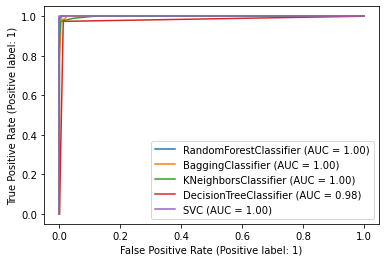

In [69]:
from sklearn.metrics import plot_roc_curve

classifiers = [RF, bclf, knn, clf,svc ]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax)

In [70]:
with open("RF", "wb") as f:
    pickle.dump(RF, f)